# Capstone Project - Week 2

In [1]:
!pip install wikipedia
!pip install lxml
!pip install html5lib
!pip install beautifulSoup4
import html5lib
import lxml

import json #library to handle JSON
from pandas.io.json import json_normalize

import pandas as pd
import wikipedia as wp
import numpy as np
from bs4 import BeautifulSoup

!conda install -c conda-forge geopy --yes  ### used Foursquare API
from geopy.geocoders import Nominatim  # converts address into coordinates


import requests  # library that handles requests

# Matplotlib library
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# k-means from clustering stage
from sklearn.cluster import KMeans

# Folium library 
!conda install -c conda-forge folium=0.5.0 --yes
import folium


import io

print('All libraries imported successfully !!!')


     |████████████████████████████████| 102kB 5.9MB/s ta 0:00:011
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia
     |████████████████████████████████| 5.8MB 35.8MB/s eta 0:00:01
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                         

## <b> Data Preparation </b>

### Retriving Australian 2019 statistical data from Worldometers website 

In [2]:
url='https://www.worldometers.info/world-population/australia-population/'
df=pd.read_html(url, header=0)


## Population of Australia (2019), Migration rate and Median Age

In [4]:
df_aus_population_forecast = df[1]
df_aus_population_forecast.head(20)

,Year,Population,Yearly % Change,Yearly Change,Migrants (net),Median Age,Fertility Rate,Density (P/Km²),Urban Pop %,Urban Population,Country's Share of World Pop,World Population,AustraliaGlobal Rank
0,2019,25203198,1.23 %,305046,158246,37.3,1.87,3,85.7 %,21607414,0.33 %,7713468100,55
1,2018,24898152,1.28 %,313532,158246,37.3,1.87,3,85.6 %,21307040,0.33 %,7631091040,55
2,2017,24584620,1.33 %,321908,158246,37.3,1.87,3,85.4 %,21003923,0.33 %,7547858925,53
3,2016,24262712,1.38 %,330210,158246,37.3,1.87,3,85.3 %,20700043,0.33 %,7464022049,53
4,2015,23932502,1.56 %,355565,197875,37.2,1.89,3,85.2 %,20396531,0.32 %,7379797139,53
5,2010,22154679,1.89 %,395228,242160,36.8,1.95,3,85.0 %,18842292,0.32 %,6956823603,53
6,2005,20178540,1.22 %,237422,117856,36.5,1.77,3,84.8 %,17118434,0.31 %,6541907027,52
7,2000,18991431,1.09 %,199671,77684,35.4,1.79,2,84.6 %,16060093,0.31 %,6143493823,51
8,1995,17993074,1.19 %,206495,70216,33.6,1.86,2,85.3 %,15346879,0.31 %,5744212979,51
9,1990,16960597,1.60 %,259387,130842,32.1,1.86,2,85.8 %,14558985,0.32 %,5327231061,49


In [5]:
df_aus_population_forecast.shape

(17, 13)

## Australian Population per Age Group

In [7]:
print('Population of Australia - 2019: ',(df_aus_population_forecast['Population'][0]))
print('Urban population in Australia  - 2019: ',(df_aus_population_forecast['Urban Pop %'][0]))
print('Total Number of Migrants (Net) from 1955 till 2019 in Australia = ',(df_aus_population_forecast['Migrants (net)'].head(20).sum()))

Population of Australia - 2019:  25203198
Urban population in Australia  - 2019:  85.7 %
Total Number of Migrants (Net) from 1955 till 2019 in Australia =  2056606


In [8]:
df_population_per_age_group = df[4]
df_population_per_age_group.head()

,Age Group,Males,Male %,Females,Female %,Total Age Group Population,Age Group's share of total population
0,0-14,2524371,51.31%,2395177,48.69%,4919548,19.29%
1,15-24,1588697,51.01%,1525777,48.99%,3114474,12.21%
2,25-54,5181719,50.00%,5181895,50.00%,10363614,40.64%
3,55-64,1461112,49.23%,1506825,50.77%,2967937,11.64%
4,65+,1942726,46.99%,2191582,53.01%,4134308,16.21%


## Population per Major Australian City

In [9]:
df_population_per_city = df[6]
dfx1  = df_population_per_city.drop("#", axis=1)
dfx1

,CITY NAME,POPULATION
0,Sydney,4627345
1,Melbourne,4246375
2,Brisbane,2189878
3,Perth,1896548
4,Adelaide,1225235
...,...,...
65,Gladstone,30489
66,Kwinana,30433
67,Lismore,30086
68,Mildura,30016


## Selecting Australian state capitals

In [10]:
dfx2 = dfx1.iloc[[0,1,2,3,4,6,11,15]].reset_index(drop = True)
dfx2


,CITY NAME,POPULATION
0,Sydney,4627345
1,Melbourne,4246375
2,Brisbane,2189878
3,Perth,1896548
4,Adelaide,1225235
5,Canberra,367752
6,Hobart,216656
7,Darwin,129062


In [11]:
dfx2_indx = dfx2.set_index('CITY NAME')
dfx2_indx

,POPULATION
CITY NAME,
Sydney,4627345
Melbourne,4246375
Brisbane,2189878
Perth,1896548
Adelaide,1225235
Canberra,367752
Hobart,216656
Darwin,129062


## Creating the bar chart with Population Allocation in Australiam Capital cities

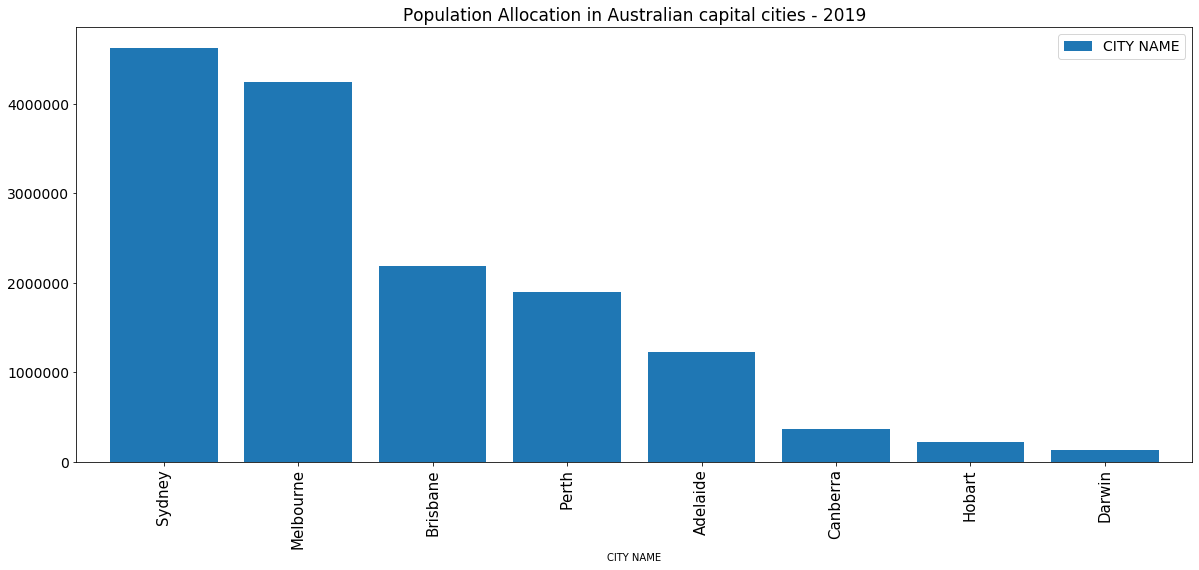

In [13]:
ax = (dfx2_indx.plot(kind = 'bar', figsize = (20, 8), width = 0.8, edgecolor = None))
plt.title('Population Allocation in Australian capital cities - 2019', fontsize = 17)
plt.legend(labels = dfx2.columns, fontsize = 14)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 14)
plt.show()

In [14]:
dfx2.columns.values

array(['CITY NAME', 'POPULATION'], dtype=object)

## Importing Geo locations for Australian Capital Cities

In [15]:
file_geo_aus_cap = 'geo_aus_cap.csv'

dfx3 = pd.read_csv(file_geo_aus_cap, index_col = 0)
dfx3

,Latitude,Longitude
CITY NAME,,
Sydney,-33.8675,151.2070
Melbourne,-37.8141,144.9633
Brisbane,-27.4710,153.0234
Perth,-31.9530,115.8575
Adelaide,-34.9286,138.6000
Canberra,-35.3082,149.1242
Hobart,-41.6400,146.3159
Darwin,-12.4628,130.8418


## <b> Data Cleansing and Preparation </b>

## A Summary Geo location information for AUS capital cities

In [16]:
dfx4 = pd.merge(dfx2, dfx3, on='CITY NAME')
dfx4

,CITY NAME,POPULATION,Latitude,Longitude
0,Sydney,4627345,-33.8675,151.2070
1,Melbourne,4246375,-37.8141,144.9633
2,Brisbane,2189878,-27.4710,153.0234
3,Perth,1896548,-31.9530,115.8575
4,Adelaide,1225235,-34.9286,138.6000
5,Canberra,367752,-35.3082,149.1242
6,Hobart,216656,-41.6400,146.3159
7,Darwin,129062,-12.4628,130.8418


In [18]:
#Renaming the columns
dfx4.rename(columns={'CITY NAME':'CITY'}, inplace=True)


In [19]:
dfx4

,CITY,POPULATION,Latitude,Longitude
0,Sydney,4627345,-33.8675,151.2070
1,Melbourne,4246375,-37.8141,144.9633
2,Brisbane,2189878,-27.4710,153.0234
3,Perth,1896548,-31.9530,115.8575
4,Adelaide,1225235,-34.9286,138.6000
5,Canberra,367752,-35.3082,149.1242
6,Hobart,216656,-41.6400,146.3159
7,Darwin,129062,-12.4628,130.8418


## <b> Presentation Layer </b>

## Creating the Folium map of Ausralia with capital cities 

In [20]:
# Creation of Folium Map with Markers

# Australia Geo Location
latitude = -24.8819
longitude = 149.3238


aus_map = folium.Map(location = [latitude, longitude], zoom_start = 4.2)

cities = folium.map.FeatureGroup()
for lat, lng, in zip(dfx4.Latitude, dfx4.Longitude):
    cities.add_child(
        folium.features.CircleMarker(
         [lat, lng],
         radius = 10,
         color ='yellow',
         fill = True,
         fill_color = 'blue',
         fill_opacity = 0.6)
    )
    
# adding pop-up text to each marker on the map
latitudes = list(dfx4.Latitude)
longitudes = list(dfx4.Longitude)
labels = list(dfx4.CITY)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(aus_map)
    
aus_map.add_child(cities)

The map above shows eight Australian capital cities. The bar graph clearly indicates that local and oversees migration settles down on two capital cities: Sydney and Melbourne. 
Other areas do not grow as fast as those two mentioned metropolis. 


## Creating the plot to see how Population of Australia is spread across the continent. The Pyplot chart should match the Foilum map of Australia and its capital cities. 

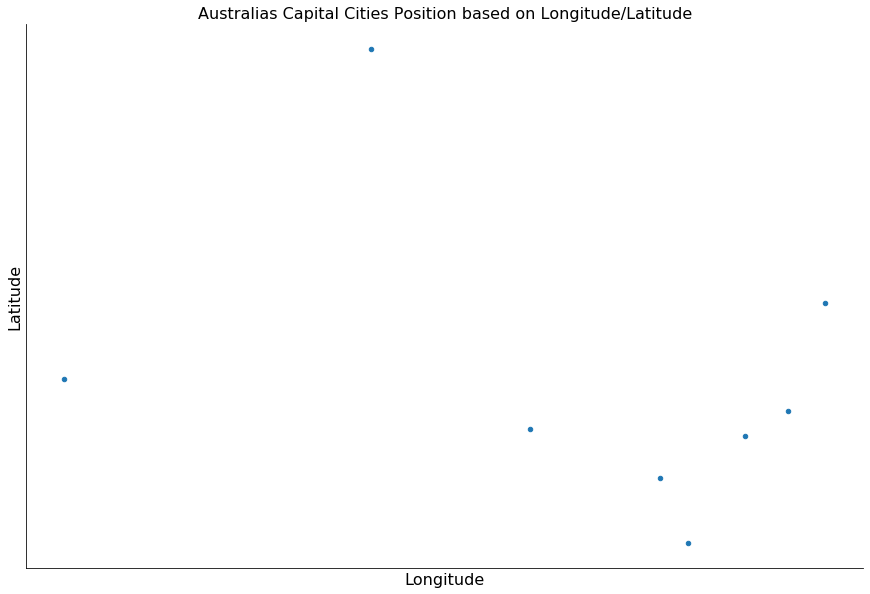

In [21]:

import matplotlib.pyplot as plt
X = dfx4[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Australias Capital Cities Position based on Longitude/Latitude', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

## <b> Results and explanation </b>

In [22]:
print('Population of Australia - 2019: ',(df_aus_population_forecast['Population'][0]))
print('Urban population in Australia  - 2019: ',(df_aus_population_forecast['Urban Pop %'][0]))
print('Total Number of Migrants (Net) from 1955 till 2019 in Australia = ',(df_aus_population_forecast['Migrants (net)'].head(20).sum()))

Population of Australia - 2019:  25203198
Urban population in Australia  - 2019:  85.7 %
Total Number of Migrants (Net) from 1955 till 2019 in Australia =  2056606


According to my research majority of population (85.7%) lives in two biggest capital cities - Sydney and Melbourne.
Sydney takes first place with 4.6 million people call it their home. Latest research indicates that  majority of migrants and young professionals settle in Sydney and Melbourne. 

Recent research also indicates that young professionals are looking for proximity to nightlife, good eating spots and job opportunities in the city, then suburbs like Redfern, Waterloo, Alexandria and Glebe (located in Sydney) are on their radar! Not only are these suburbs close to the CBD, but they are also still relatively affordable! The same can be said for Newtown and Ultimo.


Best area to live in Sydney for young professionals
https://www.openagent.com.au/blog/best-suburbs-to-live-in-sydney


## <b>Utilizing the Foursquare API to explore the neighborhoods and Venues </b>

#### Define Foursquare Credentials and Version

In [23]:
CLIENT_ID = '5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0' # your Foursquare ID
CLIENT_SECRET = 'CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0
CLIENT_SECRET:CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP


#### Exploring the most sought suburbs in Sydney central area for young professional

In [24]:
file_syd_suburbs = 'sydney_suburbs.csv'

dfx5 = pd.read_csv(file_syd_suburbs, index_col = 0)
dfx5

,Latitude,Longitude
Suburbs,,
Redfern,-33.89,151.200
Waterloo,-33.90,151.210
Alexandria,-33.90,151.200
Glebe,-33.88,151.180
Newtown,-33.90,151.170
Ultimo,-33.88,151.200
Sydney_CBD,-33.87,151.207


As we can see the most popular and affordable suburbs for young professionals are: Redfern, Waterloo, Alexandria, Glebe, Newtown and Ultimo.
They are all inner city suburbs of Sydney located within 3-5 kms radius of Sydney central business district.


Analysing the Puplot scatter map of those suburbs

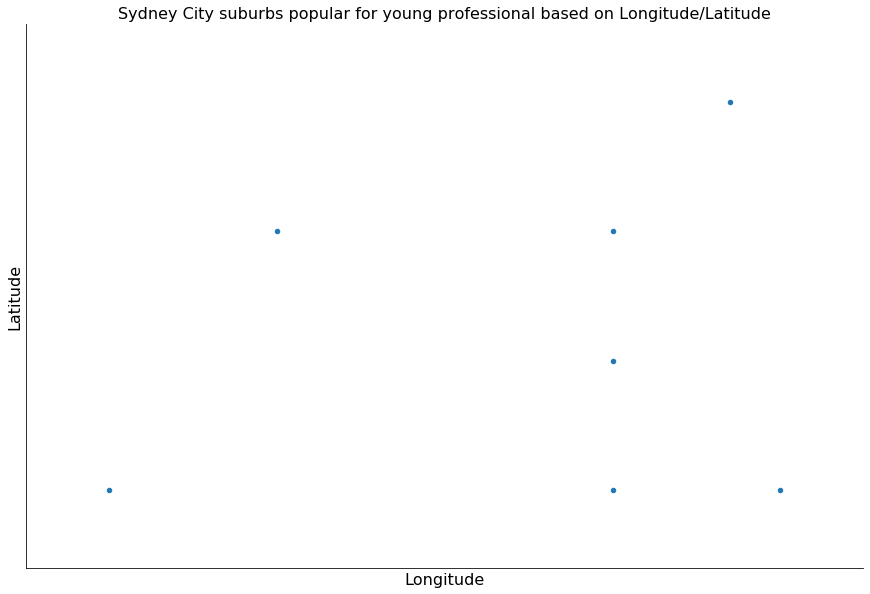

In [25]:

import matplotlib.pyplot as plt
X = dfx5[['Longitude', 'Latitude']]

scatter_plot = X.plot.scatter(x='Longitude', 
               y='Latitude',  
               fontsize = 16,
               figsize=(15, 10))

scatter_plot.set_yticklabels([])
scatter_plot.set_xticklabels([])
scatter_plot.set_xticks([])
scatter_plot.set_yticks([])
scatter_plot.spines['top'].set_color(None)
scatter_plot.spines['right'].set_color(None)
plt.xlabel('Longitude', fontsize=16)
plt.ylabel('Latitude', fontsize=16)
scatter_plot.set_title('Sydney City suburbs popular for young professional based on Longitude/Latitude', fontsize=16)

scatter_plot.set_yticklabels(labels = 'Latitude', fontdict={'fontsize': 20})
plt.show()

Because all mentioned suburbs are located in close proximity to each other I will take mean values of geo coordinates to discover 200 venues in 2km radius

In [32]:

print(dfx5[['Latitude']].mean(axis=0)) # neighborhood latitude value
print(dfx5[['Longitude']].mean(axis=0)) # neighborhood longitude value


Latitude   -33.888571
dtype: float64
Longitude    151.195286
dtype: float64


In [33]:
neighborhood_latitude = -33.888
neighborhood_longitude = 151.195

LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 2000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL


'https://api.foursquare.com/v2/venues/explore?&client_id=5AIYQGEMH11YRDOFX13CURBCVMLZ3ZYESF2QUF0LCZZ55WM0&client_secret=CCIWRH4CQPH22LVOKCA5LDAXKLLSOQSW2RPJZRN4GIRPZAYP&v=20180605&ll=-33.888,151.195&radius=2000&limit=200'

Send the GET request and examine the resutls

In [34]:
results = requests.get(url).json()
#results

Extracting categories function from the Foursquare lab - represented in Json file

In [35]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [36]:
import json
from pandas.io.json import json_normalize

Now we are ready to clean the json and structure it into a *pandas* dataframe.

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Victoria Park Swimming Pool,Pool,-33.885721,151.194119
1,Victoria Park,Park,-33.886390,151.192800
2,White Rabbit Gallery,Art Gallery,-33.886466,151.200146
3,The Duck Inn Pub & Kitchen,Pub,-33.887645,151.194670
4,LP's Quality Meats,BBQ Joint,-33.887367,151.200788
...,...,...,...,...
95,The Goods Line,Trail,-33.879093,151.200725
96,Gelato Messina,Ice Cream Shop,-33.896060,151.181170
97,Di Bella Roasting Warehouse,Café,-33.886287,151.209224
98,Chat Thai | ชาติไทย (Chat Thai),Thai Restaurant,-33.879222,151.206358


### Foursquare API discovered 100 venues wihin 200kms radius. 

### Selecting category types within tose suburbs 

In [71]:
cat = nearby_venues.groupby('categories').count()
cat1 = cat.drop('lat', axis=1)
cat2 = cat1.drop('lng', axis=1)
cat_final = cat2.rename(columns={'name':'Count'}, inplace=True)
cat_final

In [78]:
cat = nearby_venues.groupby('categories').count()
cat.rename(columns={'name':'Count'}, inplace=True)
cat_final = cat.drop(['lat', 'lng'], axis = 1)
cat_final

,Count
categories,
Art Gallery,1
Asian Restaurant,1
Australian Restaurant,1
BBQ Joint,1
Bakery,3
Bar,6
Bookstore,2
Brewery,1
Café,16


## Selecting  Cafes around the area:

Everybody loves nice coffee in the morning, so let us see how many are available and in which locations within the 2km radius.

In [90]:
cafe = nearby_venues[(nearby_venues['categories'] == 'Café') | (nearby_venues['categories'] == 'Coffee Shop')].reset_index(drop = True)
cafe

,name,categories,lat,lng
0,The Upside Cafe,Café,-33.884170,151.197900
1,"Sappho Books, Cafe & Wine Bar",Coffee Shop,-33.883139,151.191552
2,The Wedge Espresso,Coffee Shop,-33.882987,151.191269
3,Something for Jess,Café,-33.886055,151.198728
4,Henry Lee's,Café,-33.889260,151.199771
5,Azzuri Espresso,Coffee Shop,-33.889655,151.191167
6,Passiontree Velvet,Café,-33.883649,151.193859
7,Glider KS,Coffee Shop,-33.885091,151.201667
8,Lotus Story Coffee,Café,-33.882860,151.195583
9,The Q on Harris,Coffee Shop,-33.879394,151.199455


In [97]:
print('There are', cafe.shape[0], 'Cafes and Coffee Shops in the area')

There are 24 Cafes and Coffee Shops in the area
